# Forest Cover Type Analysis

## by Justin Sierchio

In this analysis, we will be looking at forest cover measurements in Roosevelt National Forest in Colorado. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What types forest cover are there?</li>
    <li>Can we predict where forest fires might occur?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/uciml/forest-cover-type-dataset/download. More information related to the dataset can be found at: https://www.kaggle.com/uciml/forest-cover-type-dataset.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_FOREST = pd.read_csv("covtype.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from SBA dataset
df_FOREST.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


This dataset contains columns describing such features as soil type, wilderness area type, shadow coverage, location to landmarks, cover type, horizontal and vertical distance to hydrology, slope, aspect and elevation.

Specifically, here is what each of the data columns represent.

<ul>
    <li>Elevation = Elevation [m]</li>
    <li>Aspect = Aspect [deg azimuth] </li>
    <li>Slope = Slope [deg]</li>
    <li> Horizontal_Distance_To_Hydrology = self-explanatory</li>
    <li> Vertical_Distance_To_Hydrology = self-explanatory</li>
    <li> Horizontal_Distance_To_Roadways = self-explanatory</li>
    <li> Hillshade_9am = Hill shade index @ 9am on summer solstice [0 to 255]</li>
    <li> Hillshade_Noon = Hill shade index @ 12pm on summer solstice [0 to 255] </li>
    <li> Hillshade_3pm = Hill shade index @ 3pm on summer solstice [0 to 255] </li>
    <li> Horizontal_Distance_To_Fire_Point = self-explanatory</li>
    <li> Wilderness_Area1-4 = (1) Rawah Wilderness Area (2) Neota Wilderness Area (3) Comanche Peak Wilderness Area (4) Cache la Poudre Wilderness Area</li>
    <li> Soil_Type1 to Soil_Type40 = self-explanatory</li>
    <li> Cover_TypeForest = (1) Spruce/Fir (2) Lodgepole Pine (3) Ponderosa Pine (4) Cottonwood/Willow (5) Aspen (6) Douglas-fir (7) Krummholz</li>

## Data Cleaning

Now let's look at the data to see if we need to do any data cleaning.

In [4]:
# Display the basic data info.
print(df_FOREST.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Let's check to make sure there is no null data.

In [5]:
# Check for 'NULL' values
df_FOREST.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


It appears that the data is complete. Now let's look at the distribution of the data.

In [6]:
# Investigate data distribution
df_FOREST.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


From the result here, we may have to scale data later when we use a classificaiton algorithm. Otherwise, the data is complete, all numerically coded and relatively only slightly skewed in some cases.

Now let's check if the data is skewed toward low or high values.

In [7]:
# Check Skewness of Data
df_FOREST_skewness = df_FOREST.skew()
df_FOREST_skewness

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

It appears that the majority of the data is skewed right (given all the positive values). Let's attempt to plot this on a graph.

Text(0.5, 1.0, 'Feature Skewness')

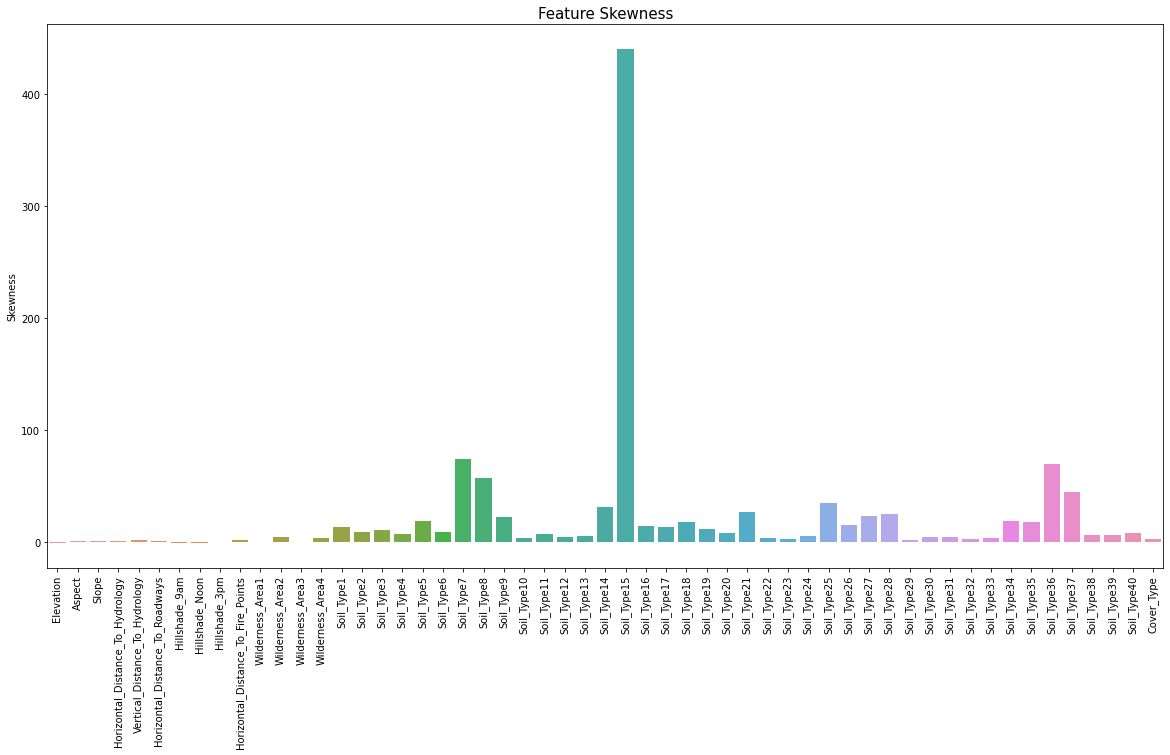

In [10]:
# Plot Skewness

# Create new Skewnewss DataFrame
df_FOREST_skew = pd.DataFrame(df_FOREST_skewness, index=None, columns=['Skewness'])

# Plot Skewness for each Variable
plt.figure(figsize=(20,10))
sns.barplot(x=df_FOREST_skew.index, y='Skewness', data=df_FOREST_skew)
plt.xticks(rotation=90)
plt.title('Feature Skewness',fontsize=15)

Several variables appear to have high skewness, especially Soil_Type_15. To wrap up this section, let's group together some of these variables into separate feature sets.

In [11]:
# Create new feature sets
df_FOREST_features = df_FOREST.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
df_FOREST_soiltype = df_FOREST.loc[:,'Soil_Type1':'Soil_Type40']
df_FOREST_wilderness = df_FOREST.loc[:,'Wilderness_Area1':'Wilderness_Area4']

## Data Analysis

At this juncture, in order to answer our questions of what kind of forest-cover there are and where, we need to get a sense of elevation and distance to water. Theoretically, the further the distance to water and the greater the elevation, the greater the likelihood of the area being prone to forest fires.

Let's use the Elevation and Distance to Hydrology to create a scatter plot.

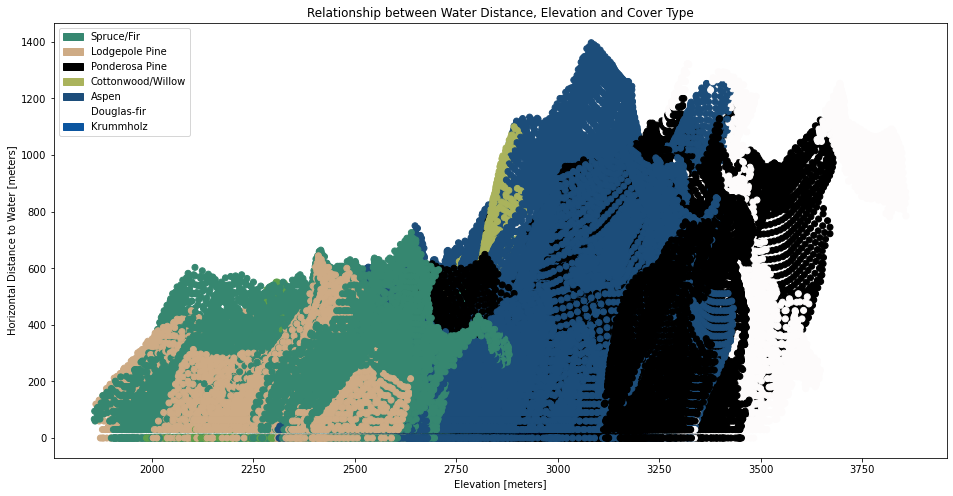

In [22]:
# Create a Scatter plot to look at Elevation and Distance to Hydrology
plt.figure(figsize=(16,8))
plt.scatter(df_FOREST_features["Elevation"], df_FOREST_features["Horizontal_Distance_To_Hydrology"],c=df_FOREST["Cover_Type"],cmap="gist_earth")
plt.title('Relationship between Water Distance, Elevation and Cover Type')

# Label the Scatter plot
import matplotlib.patches as mpatches
pop_a = mpatches.Patch(color='#368770', label='Spruce/Fir')
pop_b = mpatches.Patch(color='#CEAB85', label='Lodgepole Pine')
pop_c = mpatches.Patch(color='#000000', label='Ponderosa Pine')
pop_d = mpatches.Patch(color='#AAB35C', label='Cottonwood/Willow')
pop_e = mpatches.Patch(color='#1C4D7A', label='Aspen')
pop_f = mpatches.Patch(color='#FFFFFF', label='Douglas-fir')
pop_g = mpatches.Patch(color='#0b559f', label='Krummholz')
plt.xlabel('Elevation [meters]')
plt.ylabel('Horizontal Distance to Water [meters]')
plt.legend(handles=[pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_g])
plt.show()

Based upon our best guess, it appears that Aspen trees and Ponderosa pines are the trees that are most fire-prone.